In [ ]:
import sklearn.datasets as skdatasets
import numpy as np
from sklearn import preprocessing

(diabetes_features, diabetes_label) = skdatasets.load_diabetes(return_X_y=True, as_frame=True)
d_features_np = np.array(diabetes_features)
d_label_np = np.array(diabetes_label)

In [ ]:
from sklearn.model_selection import train_test_split

SEED =12345

x_train, x_test, y_train, y_test = train_test_split(diabetes_features,diabetes_label,test_size=0.2,random_state=SEED)


In [ ]:
# Prepare model
import tensorflow as tf

model = tf.keras.Sequential()

model.add(tf.keras.Input(shape=(d_features_np.shape[1],)))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='linear'))
model.compile(optimizer='adam', loss='mse',metrics=['mse','mae'])


In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=16, epochs=20)

Epoch 1/20
23/23 [==============================] - 3s 20ms/step - loss: 28983.2188 - mse: 28983.2188 - mae: 151.7708 - val_loss: 29278.7480 - val_mse: 29278.7480 - val_mae: 153.0543
Epoch 2/20
23/23 [==============================] - 0s 5ms/step - loss: 28914.2559 - mse: 28914.2559 - mae: 151.5419 - val_loss: 29188.1465 - val_mse: 29188.1465 - val_mae: 152.7625
Epoch 3/20
23/23 [==============================] - 0s 5ms/step - loss: 28800.7676 - mse: 28800.7676 - mae: 151.1732 - val_loss: 29038.4746 - val_mse: 29038.4746 - val_mae: 152.2817
Epoch 4/20
23/23 [==============================] - 0s 5ms/step - loss: 28617.1113 - mse: 28617.1113 - mae: 150.5716 - val_loss: 28801.2871 - val_mse: 28801.2871 - val_mae: 151.5200
Epoch 5/20
23/23 [==============================] - 0s 5ms/step - loss: 28328.5078 - mse: 28328.5078 - mae: 149.6429 - val_loss: 28439.3320 - val_mse: 28439.3320 - val_mae: 150.3583
Epoch 6/20
23/23 [==============================] - 0s 6ms/step - loss: 27901.7148 - mse:

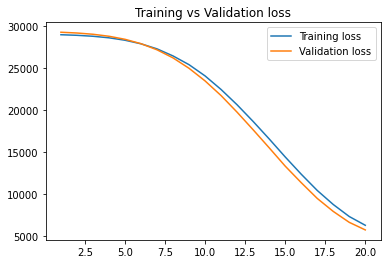

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

training_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(training_loss)+1)

plt.plot(epochs,training_loss, label='Training loss')
plt.plot(epochs, val_loss, label= 'Validation loss')
plt.title('Training vs Validation loss')
plt.legend()
plt.figure()
plt.show()

In [ ]:
from sklearn.model_selection import KFold

train_acc_list = []
val_acc_list = []

features_np = np.array(d_features_np)
labels_np = np.array(d_label_np)

kfold = KFold(n_splits=10,shuffle=True)
for train, test in kfold.split(features_np,labels_np):
  model.compile(optimizer='adam', loss='mse',metrics=['mse','mae'])
  history = model.fit(features_np[train],labels_np[train],
                      validation_data=(features_np[test],labels_np[test]),
                      batch_size=16,epochs=30)
  train_acc_list.append(history.history['loss'][-1])
  val_acc_list.append(history.history['val_loss'][-1])
  tf.keras.backend.clear_session()
  
print(f'Mean training accuracy = {np.mean(train_acc_list)}')
print(f'Mean validation accuracy = {np.mean(val_acc_list)}')

Epoch 1/30
25/25 [==============================] - 1s 11ms/step - loss: 3382.3638 - mse: 3382.3638 - mae: 48.2826 - val_loss: 2752.4373 - val_mse: 2752.4373 - val_mae: 44.0077
Epoch 2/30
25/25 [==============================] - 0s 5ms/step - loss: 3360.7163 - mse: 3360.7163 - mae: 48.2044 - val_loss: 2737.2461 - val_mse: 2737.2461 - val_mae: 43.8099
Epoch 3/30
25/25 [==============================] - 0s 6ms/step - loss: 3345.7986 - mse: 3345.7986 - mae: 48.0935 - val_loss: 2729.0701 - val_mse: 2729.0701 - val_mae: 43.6677
Epoch 4/30
25/25 [==============================] - 0s 5ms/step - loss: 3330.2195 - mse: 3330.2195 - mae: 47.7982 - val_loss: 2690.2466 - val_mse: 2690.2466 - val_mae: 43.3736
Epoch 5/30
25/25 [==============================] - 0s 5ms/step - loss: 3309.8486 - mse: 3309.8486 - mae: 47.7244 - val_loss: 2703.1199 - val_mse: 2703.1199 - val_mae: 43.3017
Epoch 6/30
25/25 [==============================] - 0s 6ms/step - loss: 3292.7285 - mse: 3292.7285 - mae: 47.5446 - val